In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
species = df['species'].value_counts().reset_index()
species

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


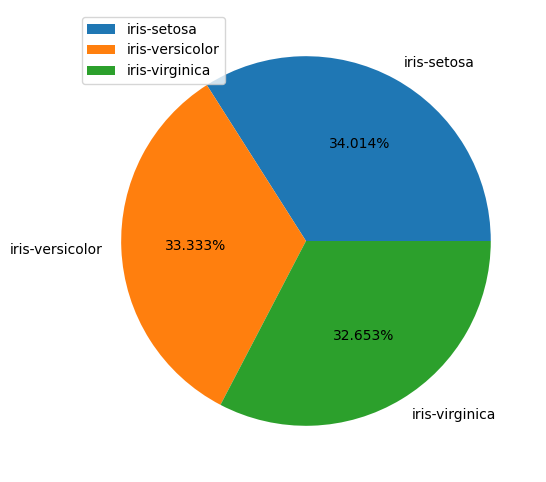

In [13]:
plt.figure(figsize=(6,6))
plt.pie(species['count'],labels=['iris-setosa','iris-versicolor','iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

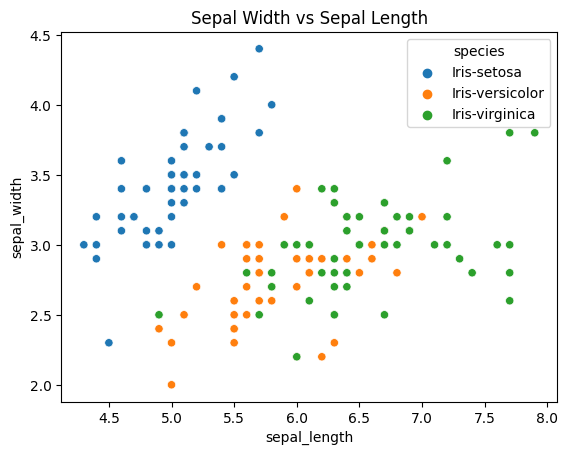

In [14]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.title('Sepal Width vs Sepal Length')
plt.show()

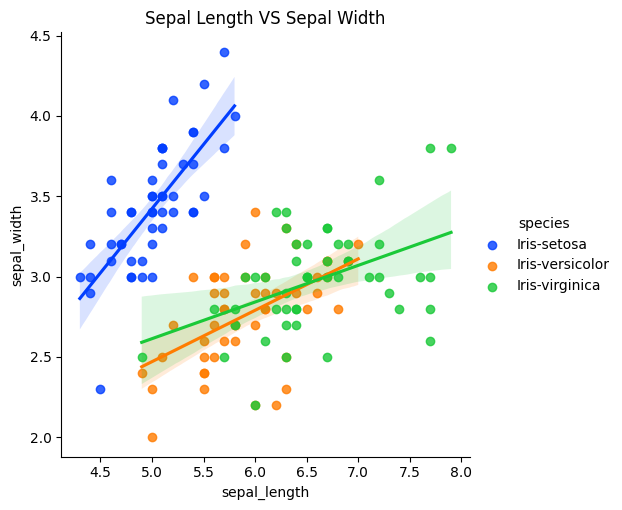

In [15]:

sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

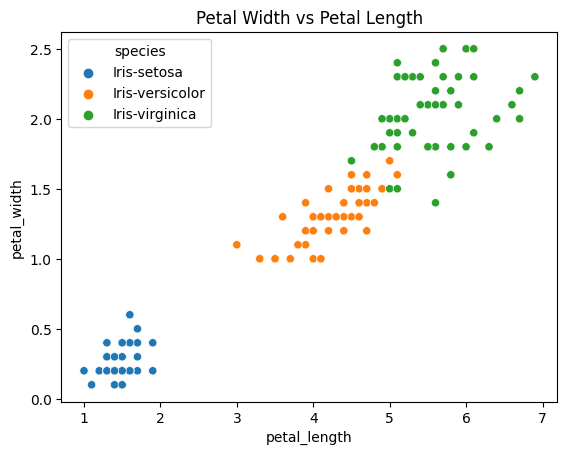

In [16]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')
plt.title('Petal Width vs Petal Length')
plt.show()

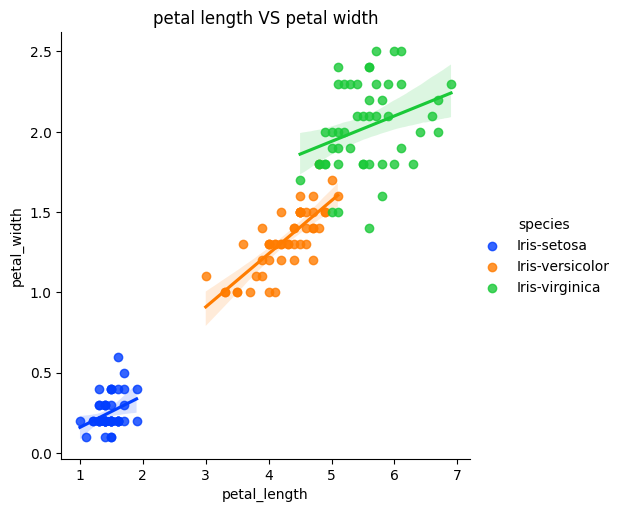

In [17]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("petal length VS petal width")
plt.show()

In [18]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
newdf = df.drop(columns='species',axis=1)

In [20]:
newdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
newdf.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: >

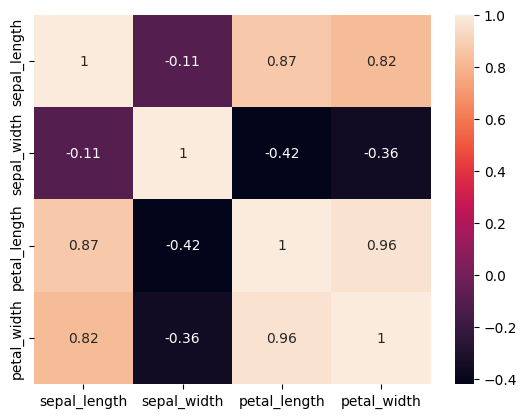

In [23]:
sns.heatmap(newdf.corr(), annot=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
X = df.drop(['species'], axis=1)
y = df['species']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [29]:
len(X_train)

117

In [30]:
len(X_test)

30

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
knn.score(X_test, y_test)

1.0

In [35]:
knn.predict(X_test)

array([1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 2, 0, 0])

In [36]:
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data
